# Import

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


## Load and Process Badminton Data

This code snippet performs the following tasks:

1. Loads data from an Excel file named 'badmintondata.xlsx' using the `read_excel` function.
2. Identifies consecutive rows of all zeros in the loaded data using a boolean mask.
3. Creates groups based on the mask values, where each group represents a sequence of non-zero rows followed by zero rows.
4. Filters out consecutive rows of all zeros from the original dataframe using the inverted mask.

The resulting grouped dataframe can be used for further analysis or processing.


In [41]:
# Load the data from Excel
df = pd.read_excel('badmintondata.xlsx')

# Identify consecutive rows of all zeros
mask = (df == 0).all(axis=1)  # Create a boolean mask indicating rows where all values are zeros
groups = mask.cumsum()  # Create groups by cumulatively summing the mask values (1 for non-zero rows, increasing by 1 for zero rows)

# Filter out consecutive rows of all zeros
filtered_df = df[~mask]  # Filter the original dataframe to exclude consecutive rows of all zeros

filtered_df

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
0,4,1,10,40,0,4.075543,1.000000,1.662912
1,4,1,10,40,0,4.152007,1.000000,1.724866
2,4,1,10,40,0,4.228906,1.000000,1.788139
3,4,1,10,40,0,4.302100,1.000000,1.845245
4,4,1,10,40,0,4.376877,1.000000,1.904128
...,...,...,...,...,...,...,...,...
72634,4,4,70,70,15,9.217823,5.398111,2.591053
72635,4,4,70,70,15,9.275177,5.413480,2.041410
72636,4,4,70,70,15,9.326363,5.427195,1.463594
72637,4,4,70,70,15,9.370879,5.439123,0.862842


## Add Time Field to Grouped Data

This code snippet extends the previous code and performs the following tasks:

1. Groups the filtered dataframe based on the groups created earlier.
2. Defines a function named `add_time_field` that adds a new column named 'Time' to each group.
3. The 'Time' column is calculated as the index position within each group multiplied by 10, representing time in milliseconds.
4. Applies the `add_time_field` function to each group in the grouped dataframe using the `apply` method.

The resulting `grouped_df` will now include the 'Time' column added to each group, representing the time in milliseconds for each row within the group.

This step is useful for adding a time-based dimension to the grouped data for further analysis or visualization.


In [42]:
# Group the data before each group of zeros
grouped_df = filtered_df.groupby(groups, group_keys=False)

# Function to add a Time field to a group
def add_time_field(group):
    group['Time'] = np.arange(len(group)) * 10  # Multiply by 10 to get time in ms
    return group

grouped_df = grouped_df.apply(add_time_field)

The code snippet provided creates a figure with three subplots, each representing the position of a shuttlecock in a different axis (X, Y, Z) over time. The code accomplishes the following:

1. It sets up the figure and axes using the `subplots` function, creating a layout of 3 rows and 1 column.
2. For each subplot, it plots the corresponding shuttlecock position data against time using scatter plots.
3. It sets the labels for the x-axis and y-axis of each subplot.
4. It sets titles for each subplot indicating the shuttlecock position axis.
5. It adjusts the layout to prevent overlapping of plot elements using the `tight_layout` function.
6. Finally, it displays the plot using the `show` function.

The scatter plots visualize the position of the shuttlecock in each axis (X, Y, Z) over time, with time represented on the x-axis in milliseconds and position represented on the y-axis in meters. Each scatter plot uses markers in the shape of "x" and has a small size (s=2) and moderate transparency (alpha=0.8) to avoid overcrowding the plot.

This code can be used to analyze and visualize the trajectory or movement patterns of a shuttlecock in three-dimensional space over a given period of time.


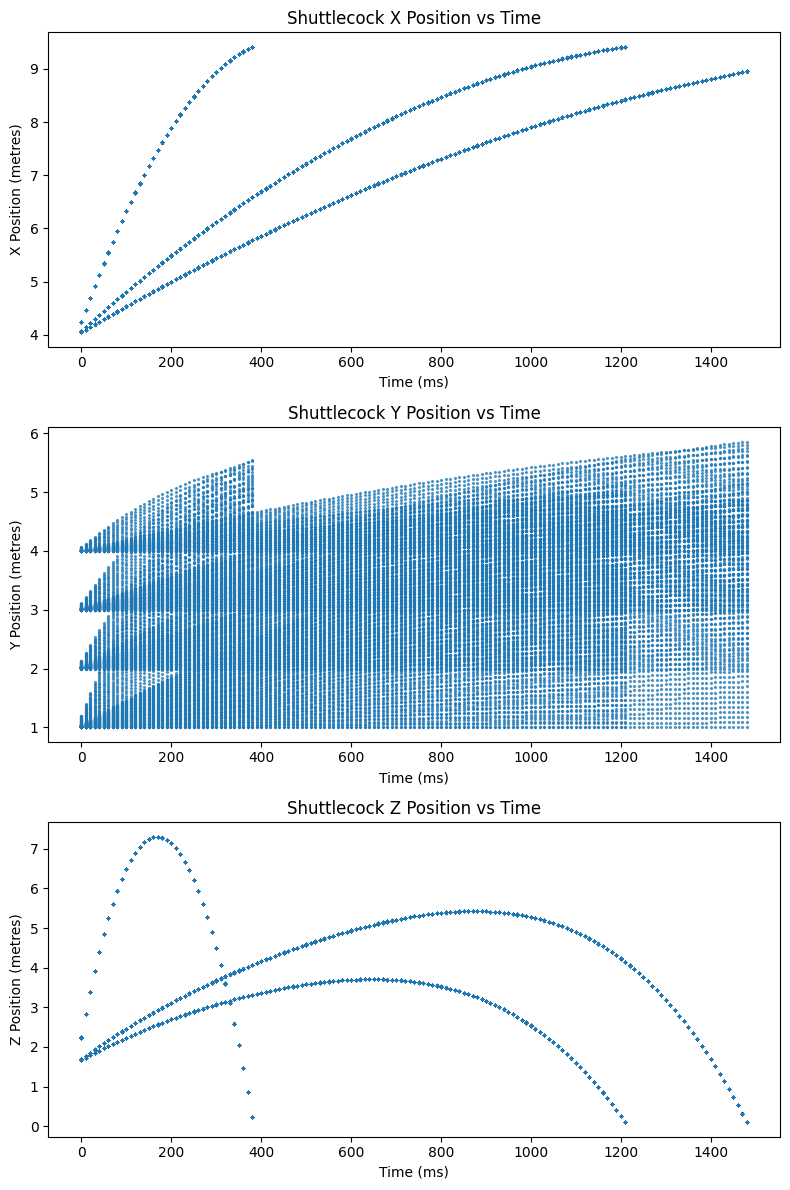

In [43]:
# Create subplots with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot the X position vs Time
axs[0].scatter(grouped_df['Time'], grouped_df['SHUTTLECOCK POSITIION IN AIR(X) metres'], marker='x', s=2, alpha=0.8)
axs[0].set_xlabel('Time (ms)')
axs[0].set_ylabel('X Position (metres)')
axs[0].set_title('Shuttlecock X Position vs Time')

# Plot the Y position vs Time
axs[1].scatter(grouped_df['Time'], grouped_df['SHUTTLECOCK POSITIION IN AIR(Y) metres'], marker='x', s=2, alpha=0.8)
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('Y Position (metres)')
axs[1].set_title('Shuttlecock Y Position vs Time')

# Plot the Z position vs Time
axs[2].scatter(grouped_df['Time'], grouped_df['SHUTTLECOCK POSITIION IN AIR(Z) metres'], marker='x', s=2, alpha=0.8)
axs[2].set_xlabel('Time (ms)')
axs[2].set_ylabel('Z Position (metres)')
axs[2].set_title('Shuttlecock Z Position vs Time')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


## Splitting Data into Training and Testing Sets

- Splits a list of groups into a training set and a testing set using an 70:30 ratio.
- The training set groups are stored in `train_groups`, and the testing set groups are stored in `test_groups`.
- Creates the training DataFrame `train_df` by concatenating the groups from `grouped_df` that belong to the training set.
- Creates the testing DataFrame `test_df` by concatenating the groups from `grouped_df` that belong to the testing set.
- Applies the function `add_time_field` to each group in the training and testing DataFrames separately.
- The `groupby` method is used on `train_df` and `test_df` to group the data based on `groups`.
- The `apply` method is used to apply the `add_time_field` function to each group, with `group_keys=False` to avoid including the group labels as index keys.


In [44]:
# Group the data before each group of zeros
grouped_df = filtered_df.groupby(groups)

# Split the groups into testing set and sample set (split into a testing set and a sample set using an 80:20 ratio)
train_groups, test_groups = train_test_split(list(grouped_df.groups), test_size=0.3, random_state=42)

# Create the training set
train_df = pd.concat([grouped_df.get_group(group) for group in train_groups])

# Create the testing set
test_df = pd.concat([grouped_df.get_group(group) for group in test_groups])

# Apply this function to each group in the train and test data
train_df = train_df.groupby(groups, group_keys=False).apply(add_time_field)
test_df = test_df.groupby(groups, group_keys=False).apply(add_time_field)


## Splitting Data into Feature and Non-Feature Columns

- Defines a list of non-feature column names.
- Defines a list of feature column names.
- Creates a new DataFrame `train_Feature` containing only the feature columns from the `train_df` DataFrame.
- Creates a new DataFrame `train_nonFeature` containing only the non-feature columns from the `train_df` DataFrame.
- Re-defines the list of non-feature column names (repeated code).
- Re-defines the list of feature column names (repeated code).
- Creates a new DataFrame `test_Feature` containing only the feature columns from the `test_df` DataFrame.
- Creates a new DataFrame `test_nonFeature` containing only the non-feature columns from the `test_df` DataFrame.


In [45]:
# Define the non-feature columns
non_feature_cols = ["HUMAN PLAYER POSITION (X) metres", "HUMAN PLAYER POSITION (Y) metres",
                    "INITITAL VELOCITY OF SHUTTELCOCK(m/s)", "INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)",
                    "SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)", "Time"]

# Define the feature columns
feature_cols = ["SHUTTLECOCK POSITIION IN AIR(X) metres", "SHUTTLECOCK POSITIION IN AIR(Y) metres",
                "SHUTTLECOCK POSITIION IN AIR(Z) metres"]

# Create the train_Feature DataFrame
train_Feature = train_df[feature_cols].copy()

# Create the train_nonFeature DataFrame
train_nonFeature = train_df[non_feature_cols].copy()

# Define the non-feature columns
non_feature_cols = ["HUMAN PLAYER POSITION (X) metres", "HUMAN PLAYER POSITION (Y) metres",
                    "INITITAL VELOCITY OF SHUTTELCOCK(m/s)", "INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)",
                    "SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)", "Time"]

# Define the feature columns
feature_cols = ["SHUTTLECOCK POSITIION IN AIR(X) metres", "SHUTTLECOCK POSITIION IN AIR(Y) metres",
                "SHUTTLECOCK POSITIION IN AIR(Z) metres"]

# Create the test_Feature DataFrame
test_Feature = test_df[feature_cols].copy()

# Create the test_nonFeature DataFrame
test_nonFeature = test_df[non_feature_cols].copy()


## Polynomial Regression and Model Evaluation



In [46]:
# Extract features and target variables
X_train = train_nonFeature
y_height_train = train_Feature["SHUTTLECOCK POSITIION IN AIR(Z) metres"].to_list()
y_side_train = train_Feature["SHUTTLECOCK POSITIION IN AIR(X) metres"].to_list()
y_forward_train = train_Feature["SHUTTLECOCK POSITIION IN AIR(Y) metres"].to_list()

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

# Train regression models for each target variable
reg_height = RandomForestRegressor()
reg_height.fit(X_train_poly, y_height_train)

reg_side = RandomForestRegressor()
reg_side.fit(X_train_poly, y_side_train)

reg_forward = RandomForestRegressor()
reg_forward.fit(X_train_poly, y_forward_train)

# Evaluate R-scores on the training and test sets for each model
X_test = test_nonFeature
y_height_test = test_Feature["SHUTTLECOCK POSITIION IN AIR(Z) metres"]
y_side_test = test_Feature["SHUTTLECOCK POSITIION IN AIR(X) metres"]
y_forward_test = test_Feature["SHUTTLECOCK POSITIION IN AIR(Y) metres"]

r_score_height_train = reg_height.score(X_train_poly, y_height_train)
r_score_height_test = reg_height.score(poly.transform(X_test), y_height_test)

r_score_side_train = reg_side.score(X_train_poly, y_side_train)
r_score_side_test = reg_side.score(poly.transform(X_test), y_side_test)

r_score_forward_train = reg_forward.score(X_train_poly, y_forward_train)
r_score_forward_test = reg_forward.score(poly.transform(X_test), y_forward_test)

# Print R-scores for each model
print("Z predictor R-score on Train:", r_score_height_train)
print("Z predictor R-score on Test:", r_score_height_test)
print("Y predictor R-score on Train:", r_score_forward_train)
print("Y predictor R-score on Test:", r_score_forward_test)
print("X predictor R-score on Train:", r_score_side_train)
print("X predictor R-score on Test:", r_score_side_test)

# Use the trained models to make predictions on the test set
X_test_poly = poly.transform(X_test)

yZ_predicted = reg_height.predict(X_test_poly)
yY_predicted = reg_forward.predict(X_test_poly)
yX_predicted = reg_side.predict(X_test_poly)



Z predictor R-score on Train: 0.9999998792493733
Z predictor R-score on Test: 0.9999993832019439
Y predictor R-score on Train: 0.9999940584826887
Y predictor R-score on Test: 0.9985632544330006
X predictor R-score on Train: 0.9999998899551477
X predictor R-score on Test: 0.9999994302534976


The code calculates the RMSE for each target variable by comparing the actual test values (y_height_test, y_side_test, y_forward_test) with the corresponding predicted values (yZ_predicted, yX_predicted, yY_predicted). The mean_squared_error function from sklearn.metrics is used, and the parameter squared=False is passed to get the root of the mean squared error.

In [47]:
# Calculate RMSE for each target variable
rmse_height = mean_squared_error(y_height_test, yZ_predicted, squared=False)
rmse_side = mean_squared_error(y_side_test, yX_predicted, squared=False)
rmse_forward = mean_squared_error(y_forward_test, yY_predicted, squared=False)

# Print RMSE for each model
print("Z predictor RMSE:", rmse_height)
print("X predictor RMSE:", rmse_side)
print("Y predictor RMSE:", rmse_forward)


Z predictor RMSE: 0.0011710082247698107
X predictor RMSE: 0.0011490716680761528
Y predictor RMSE: 0.04237294392150324


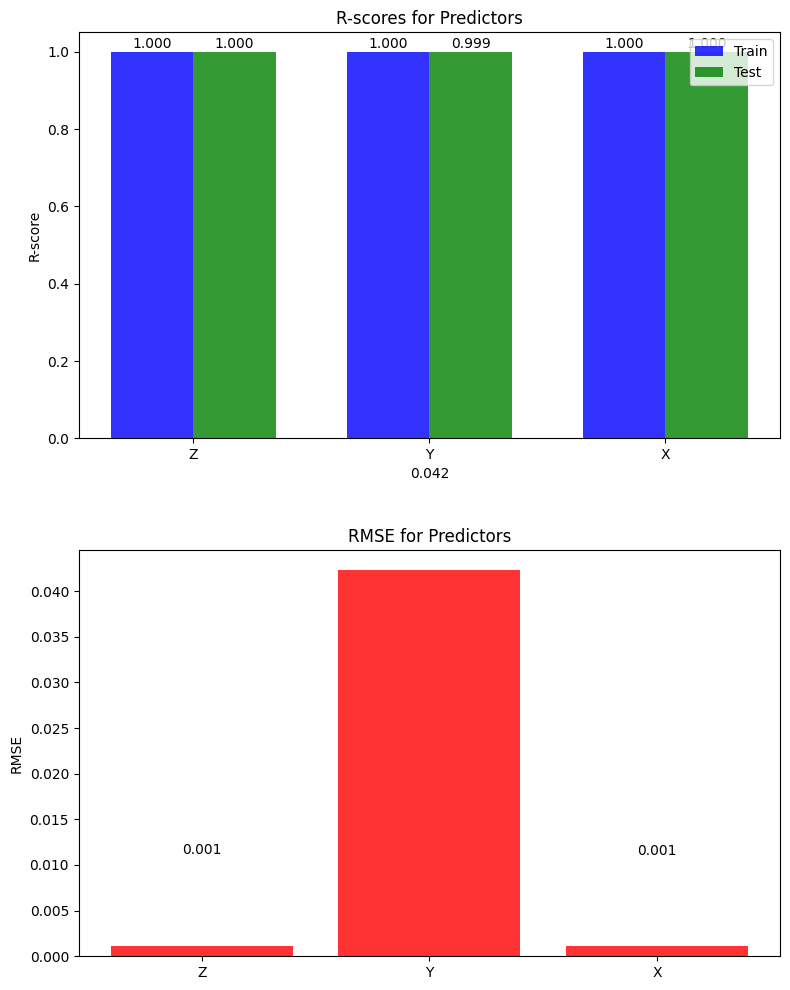

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# R-scores
r_scores_train = [r_score_height_train, r_score_forward_train, r_score_side_train]
r_scores_test = [r_score_height_test, r_score_forward_test, r_score_side_test]

# RMSE values
rmse_values = [rmse_height, rmse_forward, rmse_side]

# Create subplots for R-scores and RMSE
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Bar plot for R-scores
x = np.arange(len(r_scores_train))
bar_width = 0.35
opacity = 0.8

axs[0].bar(x, r_scores_train, bar_width, alpha=opacity, color='b', label='Train')
axs[0].bar(x + bar_width, r_scores_test, bar_width, alpha=opacity, color='g', label='Test')
axs[0].set_ylabel('R-score')
axs[0].set_title('R-scores for Predictors')
axs[0].set_xticks(x + bar_width / 2)
axs[0].set_xticklabels(['Z', 'Y', 'X'])
axs[0].legend()

# Add R-score values on top of the bars
for i, score_train, score_test in zip(x, r_scores_train, r_scores_test):
    axs[0].text(i, score_train + 0.01, f'{score_train:.3f}', ha='center')
    axs[0].text(i + bar_width, score_test + 0.01, f'{score_test:.3f}', ha='center')

# Bar plot for RMSE
axs[1].bar(x, rmse_values, alpha=opacity, color='r')
axs[1].set_ylabel('RMSE')
axs[1].set_title('RMSE for Predictors')
axs[1].set_xticks(x)
axs[1].set_xticklabels(['Z', 'Y', 'X'])

# Add RMSE values on top of the bars
for i, rmse in zip(x, rmse_values):
    axs[1].text(i, rmse + 0.01, f'{rmse:.3f}', ha='center')

plt.tight_layout()
plt.show()


## Creating Subplots and Scatter Plots

- Creates a figure with one row and three columns of subplots.
  - `fig` represents the figure object.
  - `ax1`, `ax2`, and `ax3` represent the three subplots.

- Removes the third subplot and adds a new subplot with 3D projection.
  - `ax3.remove()` removes the existing subplot.
  - `ax3 = fig.add_subplot(1, 3, 3, projection='3d')` adds a new subplot with 3D projection.

- Creates a scatter plot for Z position vs Time in the first subplot (`ax1`).
  - `ax1.scatter` plots the actual Z position values against time.
  - `ax1.scatter` plots the predicted Z position values against time.
  - Sets the x-axis label to 'Time', y-axis label to 'Z Position (meters)', and title to 'Shuttlecock Z Position vs Time'.
  - Adds a legend to distinguish actual and predicted data points.

- Creates a scatter plot for X position vs Time in the second subplot (`ax2`).
  - `ax2.scatter` plots the actual X position values against time.
  - `ax2.scatter` plots the predicted X position values against time.
  - Sets the x-axis label to 'Time', y-axis label to 'X Position (meters)', and title to 'Shuttlecock X Position vs Time'.
  - Adds a legend to distinguish actual and predicted data points.

- Creates a 3D scatter plot for Y position, Time, and slant angle in the third subplot (`ax3`).
  - `ax3.scatter3D` plots the actual Y position values against time and slant angle.
  - `ax3.scatter3D` plots the predicted Y position values against time and slant angle.
  - Sets the x-axis label to 'Time', y-axis label to 'Shuttlecock Slant Angle to Sideline (Degrees)', z-axis label to 'Y Position (meters)', and title to 'Shuttlecock Y Position vs Time'.
  - Adds a legend to distinguish actual and predicted data points.

- Adjusts the layout and displays the plot.


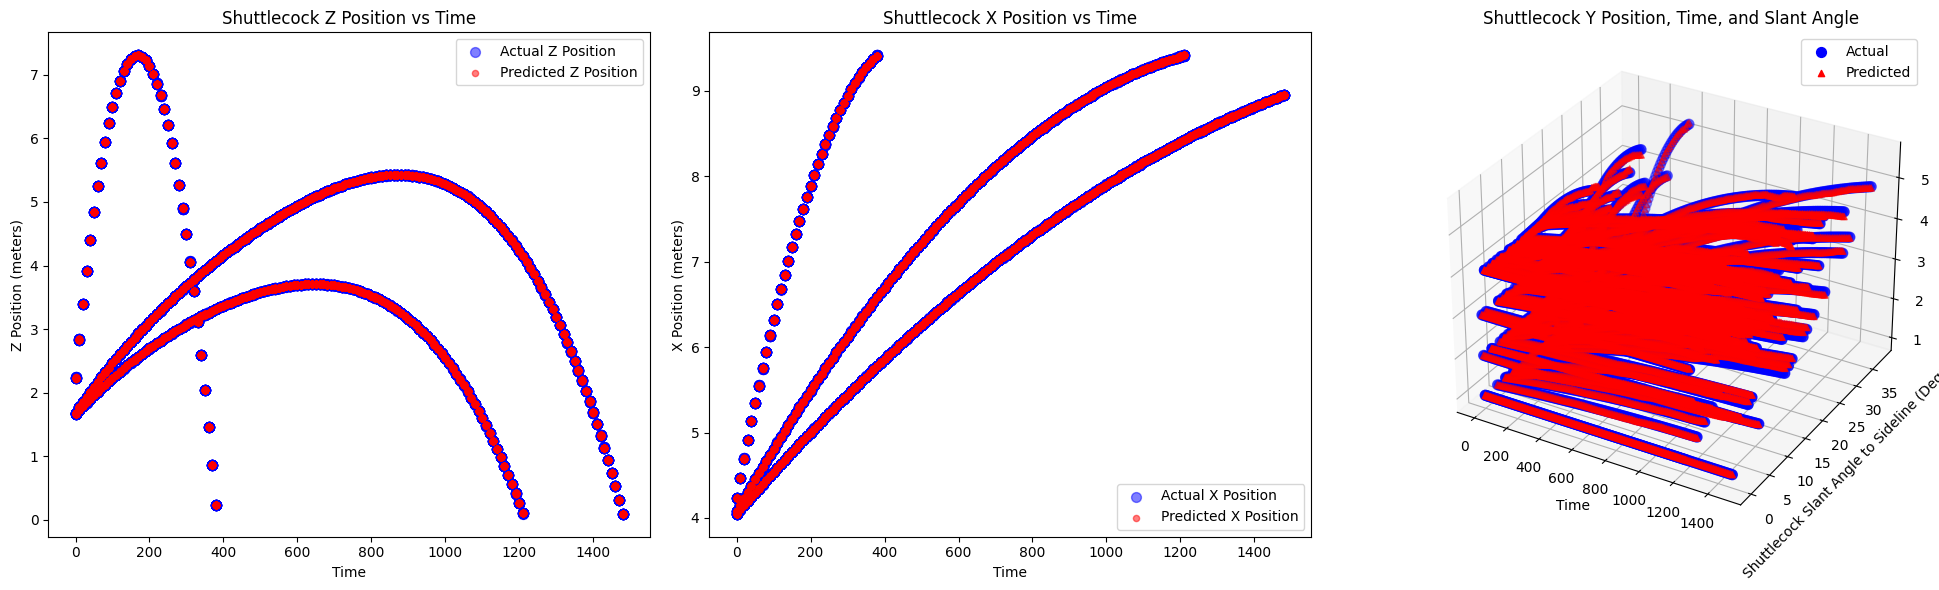

In [54]:
# Create subplots with one row and three columns
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133, projection='3d')

# Generate colors for actual and predicted data
actual_color = 'b'
predicted_color = 'r'

# Scatter plot for Z position vs Time
ax1.scatter(test_nonFeature["Time"], test_Feature["SHUTTLECOCK POSITIION IN AIR(Z) metres"], s=50, c=actual_color, alpha=0.5, label='Actual Z Position')
ax1.scatter(test_nonFeature["Time"], yZ_predicted, c=predicted_color, s=20, alpha=0.5, label='Predicted Z Position')
ax1.set_xlabel('Time')
ax1.set_ylabel('Z Position (meters)')
ax1.set_title('Shuttlecock Z Position vs Time')
ax1.legend()

# Scatter plot for X position vs Time
ax2.scatter(test_nonFeature["Time"], test_Feature["SHUTTLECOCK POSITIION IN AIR(X) metres"], s=50, alpha=0.5, c=actual_color, label='Actual X Position')
ax2.scatter(test_nonFeature["Time"], yX_predicted, c=predicted_color, s=20, alpha=0.5, label='Predicted X Position')
ax2.set_xlabel('Time')
ax2.set_ylabel('X Position (meters)')
ax2.set_title('Shuttlecock X Position vs Time')
ax2.legend()

# Scatter plot for Y position, Time, and slant angle
actual_xs = test_nonFeature["Time"]
actual_ys = test_nonFeature["SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)"]
actual_zs = test_Feature["SHUTTLECOCK POSITIION IN AIR(Y) metres"]

predicted_xs = test_nonFeature["Time"]
predicted_ys = test_nonFeature["SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)"]
predicted_zs = yY_predicted

ax3.scatter(actual_xs, actual_ys, actual_zs, c=actual_color, marker='o', s=50, label='Actual')
ax3.scatter(predicted_xs, predicted_ys, predicted_zs, c=predicted_color, marker='^', s=20, label='Predicted')
ax3.set_xlabel('Time')
ax3.set_ylabel('Shuttlecock Slant Angle to Sideline (Degrees)')
ax3.set_zlabel('Y Position (meters)')
ax3.set_title('Shuttlecock Y Position, Time, and Slant Angle')
ax3.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Increase figure size
fig.set_size_inches(20, 6)

# Show the combined figure
plt.show()

## Generating Sample Data and Creating a 3D Plot



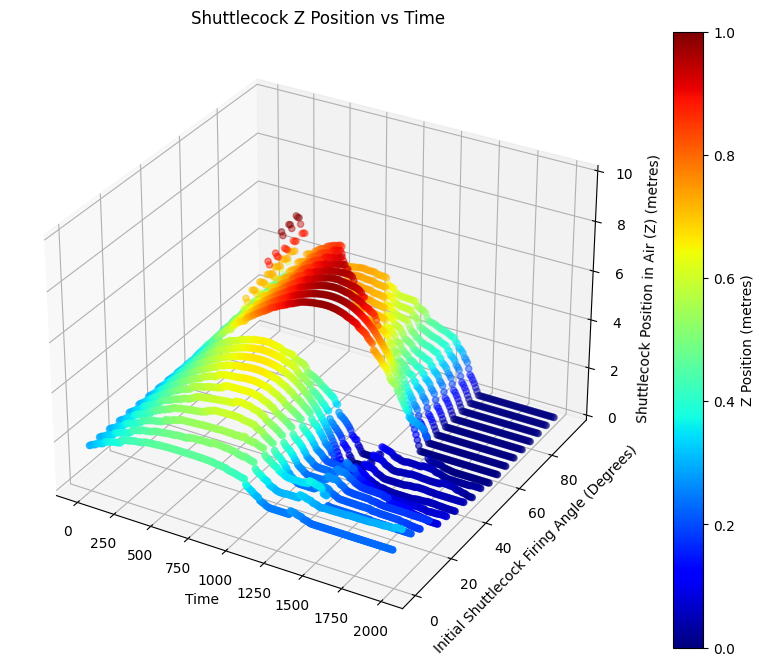

In [55]:
# Generate sample data
angle_range = range(0, 100, 5)
time_range = range(0, 2000, 10)
Sample = [[4, 1, 10, angle, 0, time] for angle in angle_range for time in time_range]

# Predict y values using a regression model
y_predictions = reg_height.predict(poly.fit_transform(Sample))

# Set negative predictions to zero
y_predictions = np.maximum(y_predictions, 0)

# Create a DataFrame for the sample data
sample_df = pd.DataFrame(Sample)

# Extract relevant variables
time = sample_df[5]
shuttlecock_z_position = y_predictions
initial_firing_angle = sample_df[3]

# Filter data points with non-negative y predictions
filtered_indices = np.where(shuttlecock_z_position >= 0)
filtered_time = np.array(time)[filtered_indices]
filtered_z_position = np.array(shuttlecock_z_position)[filtered_indices]
filtered_angle = np.array(initial_firing_angle)[filtered_indices]

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Set z-axis limits
ax.set_zlim(0, 10)

# Scatter plot the filtered data
ax.scatter(filtered_time, filtered_angle, filtered_z_position, c=filtered_z_position, cmap='jet')

# Set axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Initial Shuttlecock Firing Angle (Degrees)')
ax.set_zlabel('Shuttlecock Position in Air (Z) (metres)')
ax.set_title('Shuttlecock Z Position vs Time')

# Add color bar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='jet'), ax=ax)
cbar.set_label('Z Position (metres)')

# Display the plot
plt.show()
